In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [26]:
np.random.seed(53)  # for reproducibility
x = np.linspace(1, 10, 10)#generating x data
a = 2 #slope
b = 1 # intercept
sigma0=3 #standard deviation of the noise
y_data_sets = []

for _ in range(20):
    noise = np.random.normal(0, sigma0, size=len(x))
    noise[3:7] = np.random.normal(0, 10, size=4)  # for x = 4,5,6,7
    y = a * x + b + noise
    y_data_sets.append(y)

In [27]:
y_data_sets = np.array(y_data_sets) #converting to numpy array 
y_mean = np.mean(y_data_sets, axis=0) #mean of y data
y_std = np.std(y_data_sets, axis=0,ddof=1) #standard deviation of y data

In [28]:
#modeling
def linear_model(x, a, b):
    return a * x + b    

#least square fitting
popt_ls,  pcov_ls  = curve_fit(linear_model,
                               x, y_mean,)
#testing
ls_a, ls_b = popt_ls #slope and intercept of the fitted line
#get the uncertainties of the fitted parameters
perr_ls = np.sqrt(np.diag(pcov_ls)) #standard deviation of the fitted parameters
perr_a_ls, perr_b_ls = perr_ls #uncertainties of the slope and intercept

# plt.plot(x, y_data_sets.T, 'o', color='gray', alpha=0.5) #plotting the data points
# plt.errorbar(x, y_mean, yerr=y_std, fmt='o', color='r',ecolor="r", label='Mean with Std Dev',capsize=5)
# plt.plot(x, linear_model(x, ls_a, ls_b), 'b', label='Least Squares Fit')    
# plt.grid(True)
# plt.show()


In [29]:
#chi-square fitting
popt_chi, pcov_chi = curve_fit(linear_model,
                               x, y_mean,
                               sigma = y_std,
                               absolute_sigma=True)
chi_a, chi_b = popt_chi #slope and intercept of the fitted line

chi_err = np.sqrt(np.diag(pcov_chi)) #standard deviation of the fitted parameters
chi_err_a, chi_err_b = chi_err #uncertainties of the slope and intercept



chi_squared_ls : 0.10052723323577031
chi_squared_chi : 0.095841746350364


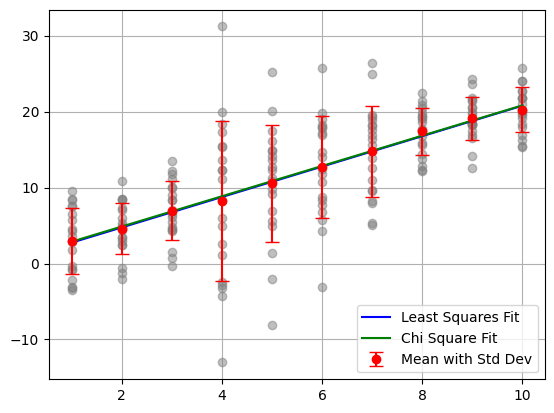

In [30]:
#calcualting the chi-square value
def chi2(obs_y, fit_y, sigma_y):
    return np.sum(((obs_y - fit_y) / sigma_y) ** 2)

chi2_ls = chi2(y_mean, linear_model(x, ls_a, ls_b), y_std)
chi2_chi = chi2(y_mean, linear_model(x, chi_a, chi_b), y_std)
print(f'chi_squared_ls : {chi2_ls}')
print(f'chi_squared_chi : {chi2_chi}')


#plot both chi square and least square fitting as well as error bars and all data points and mean
plt.plot(x, y_data_sets.T, 'o', color='gray', alpha=0.5) #plotting the data points
plt.errorbar(x, y_mean, yerr=y_std, fmt='o', color='r',ecolor="r", label='Mean with Std Dev',capsize=5)
plt.plot(x, linear_model(x, ls_a, ls_b), 'b', label='Least Squares Fit')
plt.plot(x, linear_model(x, chi_a, chi_b),'g', label='Chi Square Fit')
plt.grid(True)
plt.legend()
plt.show()